In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocess
from collections import Counter
import pprint
from scipy.stats import chisquare
from sklearn.decomposition import PCA
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

In [184]:
merged_df = pd.read_csv("TopCharts_merged.csv", index_col = 0)

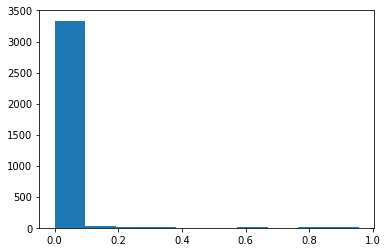

count    3431.000000
mean        0.013967
std         0.087602
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000021
max         0.956000
Name: Instrumentalness, dtype: float64


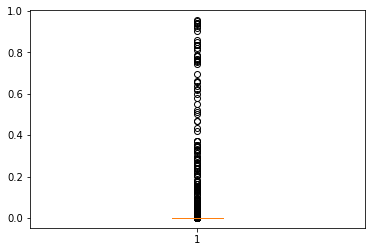

count    3431.000000
mean        0.232723
std         0.255654
min         0.000000
25%         0.037200
50%         0.132000
75%         0.346000
max         0.994000
Name: Acousticness, dtype: float64


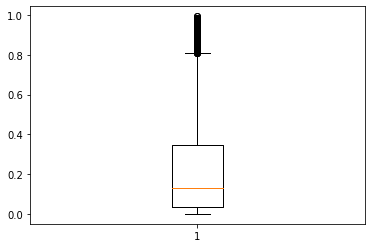

In [185]:
merged_df.head()
plt.hist(merged_df.Instrumentalness)
plt.show()
print(merged_df.Instrumentalness.describe())
plt.boxplot(merged_df.Instrumentalness)
plt.show()
print(merged_df.Acousticness.describe())
plt.boxplot(merged_df.Acousticness)
plt.show()

In [186]:
clean_df = merged_df.drop(columns = ["Time Signature", "Key", "Mode","Instrumentalness", "Days"])

In [187]:
clean_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,159.801,0.129,0.585,0.520,0.1240,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,143.950,0.291,0.556,0.538,0.0689,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,180.064,0.381,0.664,0.667,0.6400,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,123.146,0.492,0.630,0.804,0.2150,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,81.967,0.127,0.665,0.498,0.2280,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


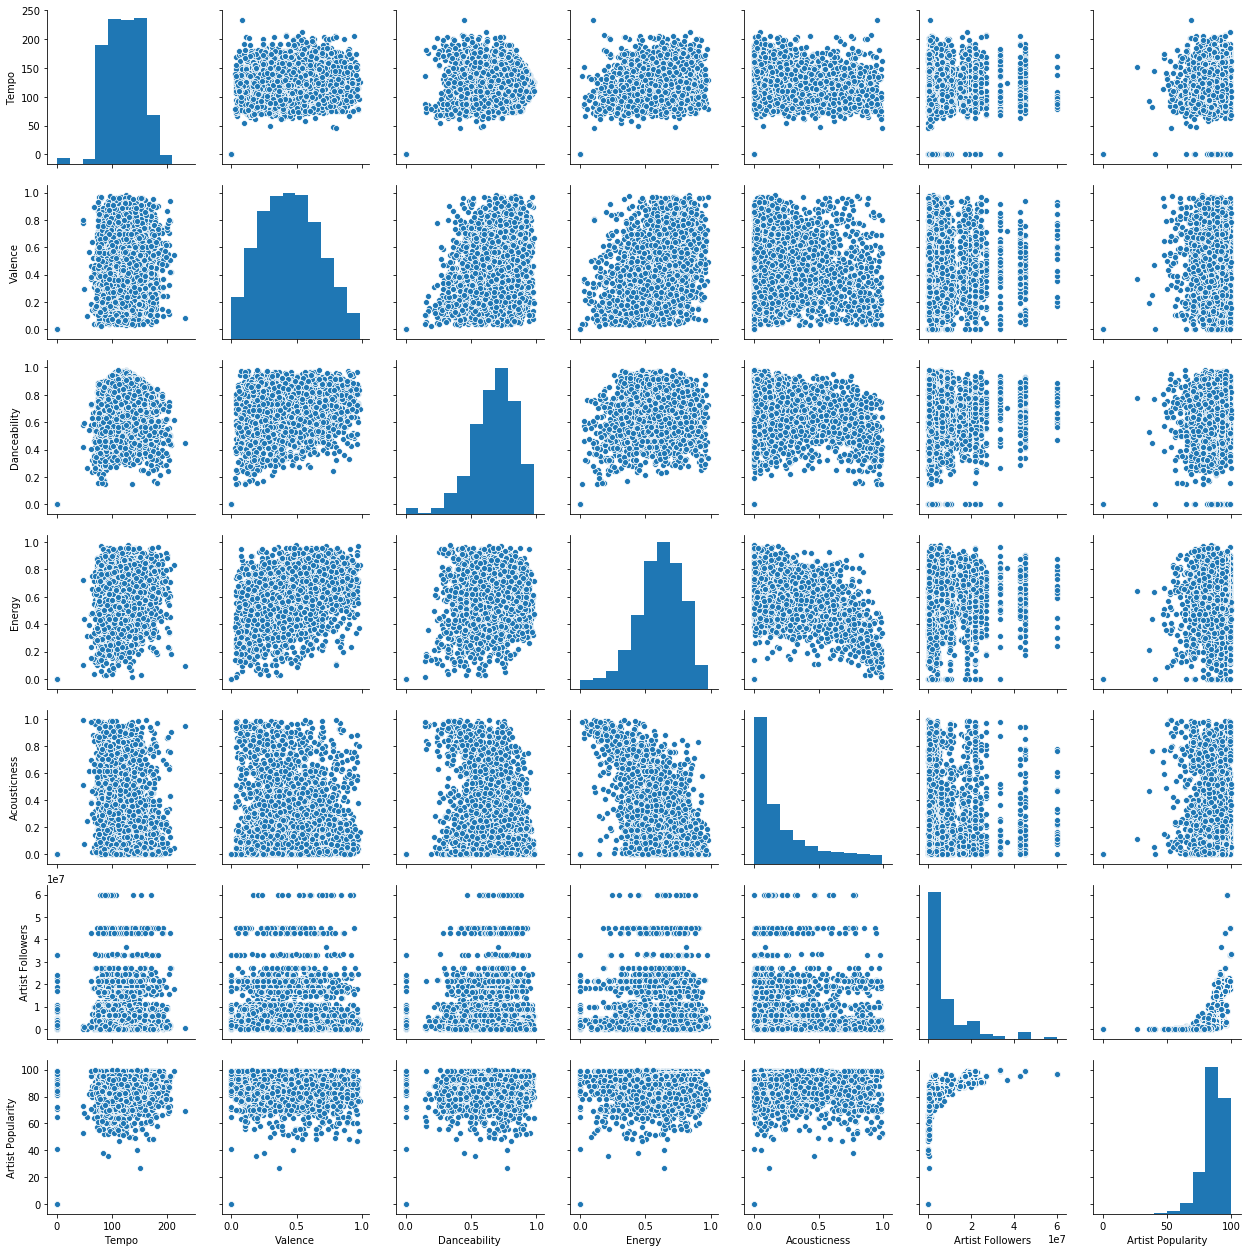

In [188]:
sns.pairplot(clean_df.iloc[:,[3,4,5,6,7,9,10]])

In [189]:
clean_df.corr()

,Tempo,Valence,Danceability,Energy,Acousticness,Artist Followers,Artist Popularity
Tempo,1.000000,0.091049,0.174419,0.226322,-0.109426,-0.020879,0.039203
Valence,0.091049,1.000000,0.282667,0.388269,-0.072317,-0.028843,-0.080296
Danceability,0.174419,0.282667,1.000000,0.190144,-0.248880,-0.021509,0.118462
Energy,0.226322,0.388269,0.190144,1.000000,-0.480549,-0.016084,0.034683
Acousticness,-0.109426,-0.072317,-0.248880,-0.480549,1.000000,0.020678,-0.082080
Artist Followers,-0.020879,-0.028843,-0.021509,-0.016084,0.020678,1.000000,0.577885
Artist Popularity,0.039203,-0.080296,0.118462,0.034683,-0.082080,0.577885,1.000000


In [190]:
def getColNames(df, col_idxs):
    return [df.columns[i] if type(col_idxs[0] == int) else col_idxs for i in col_idxs ]

In [191]:
cluster_cols = getColNames(clean_df, [3,4,5,6,7])

In [192]:
def scaleData(scaler, df, col_list):
    
    """
    purpose: normalizes continuous values in dataframe
    
    inputs:  scaler:    one of the scaler functions from sklearn.preprocessing
             song_df:   dataframe of songs (with titles) 
             firstCol:  index of first column of continuous values to be rescaled in song_df 
    
    returns: dataframe of songs (with titles) with rescaled continuous values
    """
    
    scaled_df = df.copy()
        
    cluster_values = df.loc[:,col_list]
    mms = scaler()
    mms.fit(cluster_values)
    scaled_values = mms.transform(cluster_values)
    
    for i in range(scaled_values.shape[1]):
        scaled_df[col_list[i]] = scaled_values[:,i]

    return scaled_df

In [193]:
transformed_df = scaleData(preprocess.MinMaxScaler, clean_df, cluster_cols)

In [194]:
transformed_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,0.686755,0.131633,0.596939,0.531697,0.124748,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,0.618634,0.296939,0.567347,0.550102,0.069316,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,0.773836,0.388776,0.677551,0.682004,0.643863,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,0.529228,0.502041,0.642857,0.822086,0.216298,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,0.352258,0.129592,0.678571,0.509202,0.229376,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [195]:
def apply_pca(scaled_df, n, col_list):
    """
    purpose: applies PCA to dataframe and attaches resulting PCA values as columns to end of dataframe
    
    inputs:  scaled_df:  dataframe of songs (with titles) with scaled continuous values
             n:          number of desired principal components
             firstCol:   index of first column of continuous values
             
    returns: scaled_df with principal component columns appended to end 
    """  
    
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(scaled_df.loc[:,col_list])
    for i in range(n):
        scaled_df[f"pc{i+1}"] = principalComponents[:,i]
        
    return scaled_df
    

In [196]:
pca_df = apply_pca(transformed_df, 2, cluster_cols)

In [197]:
pca_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Artist Id,Artist Followers,Artist Popularity,Artist Genres,pc1,pc2
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,0.686755,0.131633,0.596939,0.531697,0.124748,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.092027,-0.344575
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,0.618634,0.296939,0.567347,0.550102,0.069316,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,-0.004748,-0.246609
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,0.773836,0.388776,0.677551,0.682004,0.643863,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.272450,0.181873
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,0.529228,0.502041,0.642857,0.822086,0.216298,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,-0.114752,0.036549
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,0.352258,0.129592,0.678571,0.509202,0.229376,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.197443,-0.292475


In [209]:
pca_df["Artist Genres"]

array(['rap', 'indie,rap,pop', 'trap,rap,hip hop', 'rap,pop', 'pop',
       'trap,rap,pop,hip hop', 'r&b,pop', 'trap,rap,pop', 'rap,hip hop',
       'rap,pop,hip hop', 'rock,pop', 'latin,pop', 'indie,rock,pop',
       'house', 'indie,pop', 'rock', 'rap,r&b,pop', 'house,pop',
       'trap,rap', 'house,edm,pop', 'latin', 'other',
       'trap,rap,hip hop,pop', 'pop,country', 'adult standards',
       'country', 'trap,latin,rap', 'rap,r&b,hip hop',
       'adult standards,rock', 'trap,latin,rap,pop', 'latin,rap,pop',
       'hip hop', 'rock,country', 'rock,pop,country',
       'trap,r&b,hip hop,pop,rap', 'r&b', 'edm,pop',
       'trap,hip hop,pop,rap,edm', 'indie', 'trap,rap,edm',
       'latin,hip hop', 'indie,house,edm,pop', 'r&b,hip hop,pop',
       'trap,latin,rap,hip hop', 'adult standards,rock,country',
       'trap,r&b,pop,hip hop,rap', 'rap,hip hop,pop', 'house,edm',
       'rock,indie', 'pop,hip hop', 'indie,house,pop',
       'adult standards,pop', 'trap,rap,house,edm', 'pop,ind

In [199]:
def plotKMeans(scaled_df, col_list, minCluster, maxCluster):
    """
    purpose:  applies k-means clustering to dataframe and plots inertia and change in inertia for corresponding to number of clusters
    
    inputs:   df:          dataframe with only continuous values
              minCluster:  smallest number of desired clusters
              maxClusters: largest number of desired clusters
    
    returns:  list of intertias corresponding to number of clusters ranging from minCluster to maxCluster
    
    """

    
    df = scaled_df.loc[:,col_list]
    
    
    inertias = []
    for i in range(minCluster, maxCluster+1):
        kmeans = KMeans(n_clusters = i).fit(df)
        inertias.append(kmeans.inertia_)    
    
    plt.plot(range(1,len(inertias)+1), inertias, "bx-")
    plt.xlabel('k')
    plt.ylabel("Inertia")
    plt.xticks(range(1,len(inertias)+1))
    plt.show()
    
    
    diffs = np.array(inertias[1:]) - np.array(inertias[:len(inertias)-1])
    plt.plot(range(1,len(inertias)+1), [-inertias[0]] + list(diffs),"bx-")
    plt.ylabel("Change in Inertia")
    plt.xticks(range(1,len(inertias)+1))

    plt.show()
    
    return inertias
    

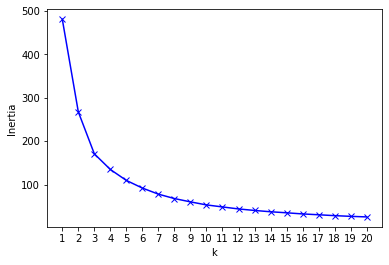

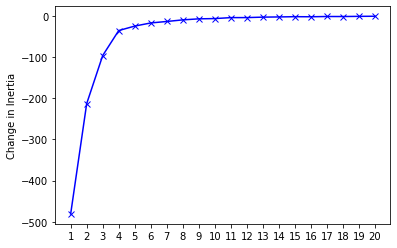

In [200]:
inertias = plotKMeans(pca_df, ["pc1","pc2"], 1, 20)

In [211]:
def fitKMeans(scaled_df, col_list, clusters):
    """
    purpose:  applies k-means clustering to dataframe
    
    inputs:   song_df:      dataframe of songs (with titles)
              clusters:  number of desired clusters
              cols_list: list of column indexes to cluster on
            
    returns:  dataframe of songs with cluster number
              dict of dataframes {cluster number: subset of song_df with songs belonging to cluster}
              dict of Counters   {cluster number: Counter(artist, number of times artist appears in cluster)}
    """
    
    kmeans_opt = KMeans(n_clusters = clusters).fit(scaled_df.loc[:,col_list])
    labels_df = scaled_df.copy()
    labels_df["Label"] = kmeans_opt.labels_
    
    return labels_df
#     groups = {}
#     counters = {}
#     for i in range(clusters):
#         groups[i] = labels_df[labels_df["Label"] == i]
#         counters[i] = Counter(groups[i]["Artist"])
    
#     return labels_df, groups, counters

In [212]:
cluster_df = fitKMeans(pca_df, cluster_cols, 7)

In [219]:
cluster_df.head()

,Artist,Title,Id,Tempo,Valence,Danceability,Energy,Acousticness,Artist Id,Artist Followers,Artist Popularity,Artist Genres,pc1,pc2,Label
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,0.686755,0.131633,0.596939,0.531697,0.124748,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.092027,-0.344575,5
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,0.618634,0.296939,0.567347,0.550102,0.069316,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,-0.004748,-0.246609,5
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,0.773836,0.388776,0.677551,0.682004,0.643863,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.272450,0.181873,4
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,0.529228,0.502041,0.642857,0.822086,0.216298,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,-0.114752,0.036549,1
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,0.352258,0.129592,0.678571,0.509202,0.229376,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap,0.197443,-0.292475,5


In [213]:
def getClusterSubset(cluster_df, cluster_idx):
    return cluster_df[cluster_df.Label == cluster_idx]

In [214]:
def getClusterArtistCount(cluster_df_subset):
    return Counter(cluster_df_subset["Artist"])

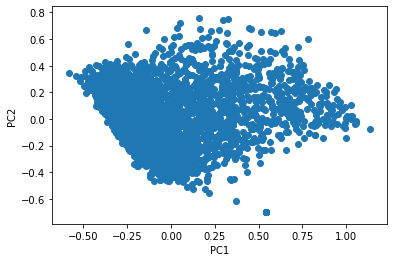

In [220]:
plt.scatter(cluster_df["pc1"], cluster_df["pc2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

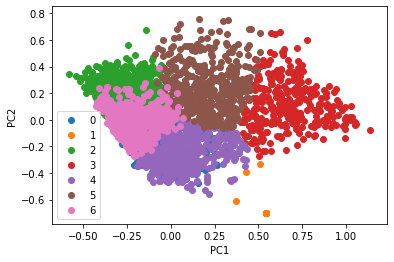

In [221]:
for i in cluster_subsets.keys():
    sub = cluster_subsets[i]
    plt.scatter(sub["pc1"], sub["pc2"], label = i)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [222]:
def getClusterSongs(cluster_df, cluster_idx, top = 0):
    
    sub = getClusterSubset(cluster_df, cluster_idx)
    artcounts = getClusterArtistCount(sub)
    
    songs = dict()
    for artist in artcounts.keys():
        songs[artist] = list(sub.loc[sub.Artist == artist, "Title"])
        
    
    if top == 0:
        return songs

    else:
        return {a[0]:songs[a[0]] for a in artcounts.most_common(top)}

In [223]:
pp.pprint(getClusterSongs(cluster_df, 1, 5))

{   'Avicii': [   'Levels - Radio Edit',
                  'Wake Me Up - Radio Edit',
                  'Without You (feat. Sandro Cavazza)',
                  'Waiting For Love',
                  'Hey Brother',
                  'The Nights',
                  'The Days',
                  'You Make Me',
                  'For A Better Day',
                  'Wake Me Up',
                  'Tough Love',
                  'Heaven',
                  'Tough Love (feat. Agnes, Vargas & Lagola)'],
    'BTS': [   'MIC Drop (feat. Desiigner) [Steve Aoki Remix]',
               'DNA',
               'So What',
               'Outro: Tear',
               'IDOL',
               'Trivia 起 : Just Dance',
               'Trivia 承 : Love',
               'Answer : Love Myself',
               'Mikrokosmos',
               'HOME',
               'Dionysus',
               'Intro : Persona',
               'Dream Glow (BTS World Original Soundtrack) - Pt. 1',
               'Black Swan'],
    'Ju

In [305]:
def getOverallGenreCounts(cluster_df):
    genres = []
    for g in cluster_df["Artist Genres"]:
        genres.extend(g.split(","))
    n = len(genres)
    cnt = dict(sorted(Counter(genres).items()))
    prop = {k:cnt[k]/n for k in cnt.keys()}
    return cnt, prop

In [306]:
total_genre_counts, total_genre_props = getOverallGenreCounts(cluster_df)

In [293]:
pp.pprint(total_genre_counts)

{   'adult standards': 94,
    'country': 135,
    'edm': 133,
    'hip hop': 1379,
    'house': 148,
    'indie': 140,
    'latin': 82,
    'other': 75,
    'pop': 2278,
    'r&b': 202,
    'rap': 1920,
    'rock': 276,
    'trap': 1083}


In [307]:
pp.pprint(total_genre_props)

{   'adult standards': 0.011831340465701699,
    'country': 0.016991818753933293,
    'edm': 0.016740088105726872,
    'hip hop': 0.173568281938326,
    'house': 0.018628067967275015,
    'indie': 0.01762114537444934,
    'latin': 0.010320956576463184,
    'other': 0.009439899307740718,
    'pop': 0.2867212083071114,
    'r&b': 0.02542479546884833,
    'rap': 0.24166142227816237,
    'rock': 0.03473882945248584,
    'trap': 0.13631214600377595}


In [296]:
all_genres = getOverallGenreCounts(cluster_df).keys()

In [300]:
def getClusterGenres(cluster_df, cluster_idx, all_genres = all_genres):
    
    sub = getClusterSubset(cluster_df, cluster_idx)
    genres = []
    for g in sub["Artist Genres"]:
        genres.extend(g.split(","))
    
    n = len(genres)
    
    cnt = Counter(genres)
    for i in all_genres - cnt.keys():
        cnt[i] = 0
    clf = cnt.most_common(1)[0][0]
    
    sorted_cnt = dict(sorted(cnt.items()))
    sorted_props = {i:sorted_cnt[i]/n for i in sorted_cnt.keys()}
    
    return clf, sorted_cnt, sorted_props
    

In [304]:
pp.pprint(getClusterGenres(cluster_df, 3))

(   'rap',
    {   'adult standards': 2,
        'country': 0,
        'edm': 1,
        'hip hop': 14,
        'house': 0,
        'indie': 3,
        'latin': 1,
        'other': 4,
        'pop': 16,
        'r&b': 3,
        'rap': 18,
        'rock': 5,
        'trap': 14},
    {   'adult standards': 0.024691358024691357,
        'country': 0.0,
        'edm': 0.012345679012345678,
        'hip hop': 0.1728395061728395,
        'house': 0.0,
        'indie': 0.037037037037037035,
        'latin': 0.012345679012345678,
        'other': 0.04938271604938271,
        'pop': 0.19753086419753085,
        'r&b': 0.037037037037037035,
        'rap': 0.2222222222222222,
        'rock': 0.06172839506172839,
        'trap': 0.1728395061728395})


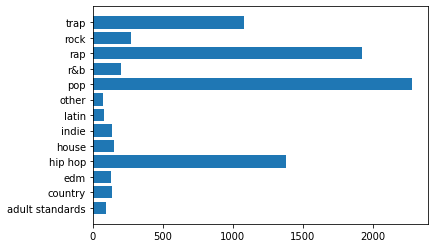

In [294]:
plt.barh(range(0,len(total_genre_counts.keys())), total_genre_counts.values())
plt.yticks(range(0,len(total_genre_counts.keys())), total_genre_counts.keys())
plt.show()


In [308]:
def propDiff(overall_props, cluster_props):
    """
    inputs: Counter of proportions of artist genres in overall dataset; 
            Counter of proportions of artist genres in single cluster
    output: Counter of absolute differences in artist genre proportions between
            single cluster and overall dataset 
    """
    return {k:float(cluster_props[k] - overall_props[k]) \
            for k in overall_props.keys()}

In [309]:
def getPropDiffs(overall_props, cluster_list):
    out = dict()
    for i in cluster_list:
        out[i] = propDiff(overall_props, getClusterGenres(cluster_df, i)[2])
    return out
    

In [310]:
prop_diffs = getPropDiffs(total_genre_props, range(7))
pp.pprint(prop_diffs)

{   0: {   'adult standards': 0.06392623529187406,
           'country': 0.0015266997645852244,
           'edm': -0.013373084738723505,
           'hip hop': -0.052356160726204776,
           'house': -0.01189406123326828,
           'indie': 0.02446639671309275,
           'latin': -0.005270451525958133,
           'other': 0.025913636045794636,
           'pop': 0.08533266374676068,
           'r&b': 0.05369978365573079,
           'rap': -0.08172876234550244,
           'rock': 0.0006147059010495129,
           'trap': -0.09085760054923049},
    1: {   'adult standards': -0.008868377502738736,
           'country': 0.019304477542363006,
           'edm': 0.02696361559797683,
           'hip hop': -0.04023494860499266,
           'house': 0.02581637647716943,
           'indie': 0.00015663240332843692,
           'latin': -0.0036542899097965166,
           'other': 0.002411952544111133,
           'pop': 0.019945458359555246,
           'r&b': -0.007647017691070554,
           'rap'

In [311]:
{i:Counter(prop_diffs[i]).most_common(1)for i in prop_diffs.keys()}

{0: [('pop', 0.08533266374676068)],
 1: [('rock', 0.029705614991958604)],
 2: [('latin', 0.019220212499589613)],
 3: [('other', 0.039942816741642)],
 4: [('pop', 0.03405173855279198)],
 5: [('rap', 0.016805600894743172)],
 6: [('trap', 0.06166207130745793)]}

In [38]:
def chisqTest(overall_props, cluster_counts):
    
    total = sum(cluster_counts.values())
    
    exp = np.array(list(overall_props.values())) * total
    obs = np.array(list(cluster_counts.values()))
    return chisquare(f_obs = obs, f_exp = exp)
    

In [39]:
def classify_chisq(overall_props, cluster_counts_dict, cluster_props_dict, cluster_diffs):
    out = dict()
    for i in cluster_counts_dict.keys():
        d = dict()
        cluster = cluster_counts_dict[i]
        results = chisqTest(overall_props, cluster)
        if results[1] <= .01:
            genre = max(cluster_diffs[i], key = cluster_diffs[i].get)
            d["Genre"] = genre
            d["Proportion"] = cluster_props_dict[i][genre]
            d["Counts"] = cluster_counts_dict[i][genre]
        else:
            mc = Counter(cluster).most_common(1) 
            d["Genre"] = mc[0]
            d["Proportion"] = cluster_props_dict[i][mc[0]]
            d["Counts"] = mc[1]
        out[i] = d
    return out
                    
        
        

In [40]:
convertCountstoProps(cluster_genre_counts[1])

{'adult standards': 0.011251758087201125,
 'country': 0.015471167369901548,
 'edm': 0.02250351617440225,
 'hip hop': 0.15049226441631505,
 'house': 0.026722925457102673,
 'indie': 0.014064697609001406,
 'latin': 0.04360056258790436,
 'other': 0.015471167369901548,
 'pop': 0.2981715893108298,
 'r&b': 0.011251758087201125,
 'rap': 0.2180028129395218,
 'rock': 0.0450070323488045,
 'trap': 0.1279887482419128}

In [41]:
prop_diffs[1]

{'adult standards': -0.01552712485082489,
 'country': -0.023549490625507784,
 'edm': -0.010396254292315422,
 'hip hop': 0.04414184360529745,
 'house': -0.012297732538306658,
 'indie': -0.022660627563148558,
 'latin': 0.023707678119656465,
 'other': -0.022019268743334874,
 'pop': 0.005134098874716608,
 'r&b': -0.02088290143843009,
 'rap': 0.05350396060593343,
 'rock': -0.032269172700927704,
 'trap': 0.03311499154719208}

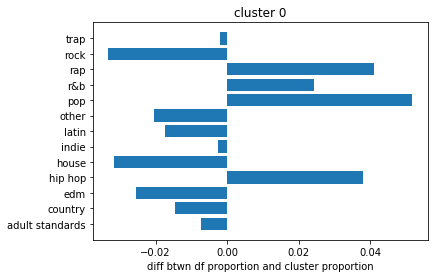

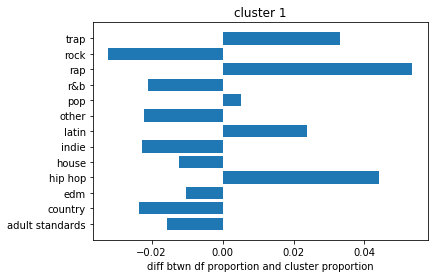

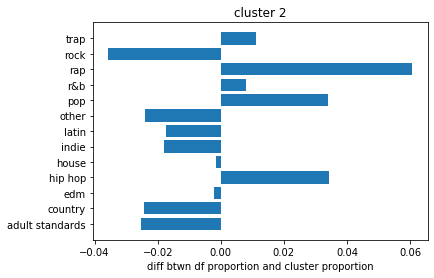

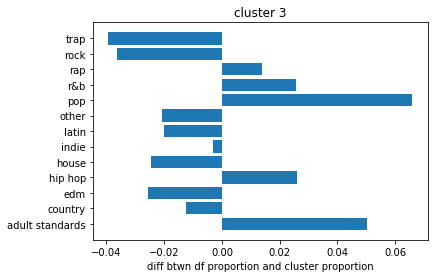

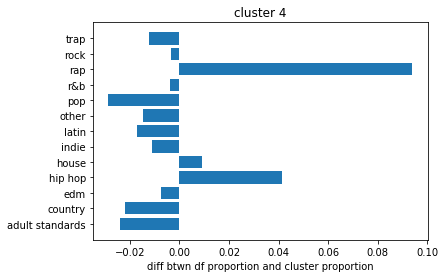

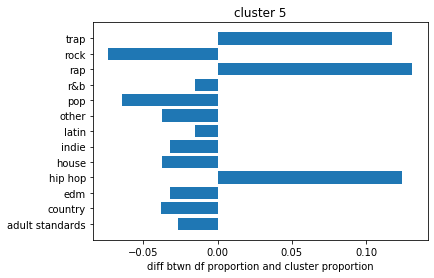

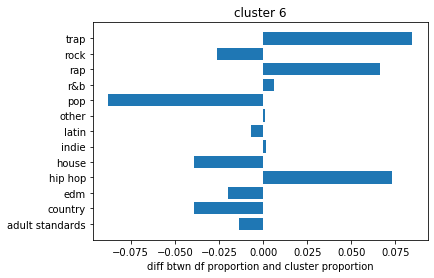

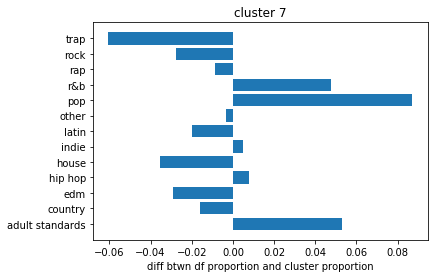

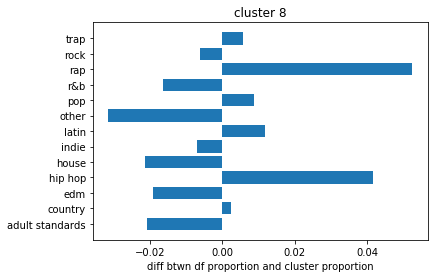

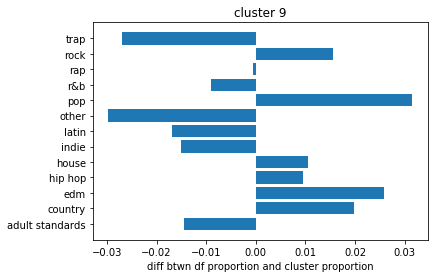

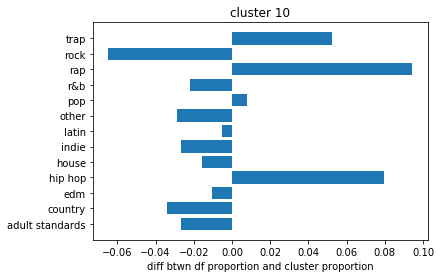

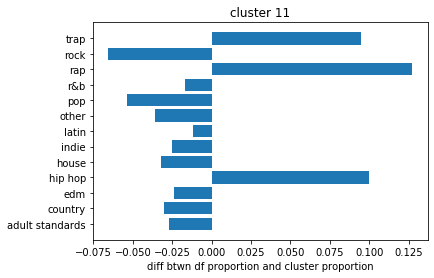

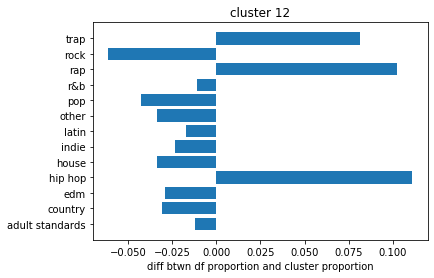

In [42]:
for i in prop_diffs.keys():
    plt.barh(range(0,len(prop_diffs[i].keys())), prop_diffs[i].values())
    plt.yticks(range(0,len(prop_diffs[i].keys())), prop_diffs[i].keys())
    plt.title(f"cluster {i}")
    plt.xlabel("diff btwn df proportion and cluster proportion")
    plt.show()


In [43]:
pp.pprint(classify_chisq(total_genre_props, cluster_genre_counts, cluster_genre_props, prop_diffs))

{   0: {'Counts': 141, 'Genre': 'pop', 'Proportion': 0.34474327628361856},
    1: {'Counts': 155, 'Genre': 'rap', 'Proportion': 0.2180028129395218},
    2: {'Counts': 168, 'Genre': 'rap', 'Proportion': 0.225201072386059},
    3: {'Counts': 149, 'Genre': 'pop', 'Proportion': 0.35903614457831323},
    4: {'Counts': 91, 'Genre': 'rap', 'Proportion': 0.2585227272727273},
    5: {'Counts': 336, 'Genre': 'rap', 'Proportion': 0.29577464788732394},
    6: {'Counts': 14, 'Genre': 'trap', 'Proportion': 0.1794871794871795},
    7: {'Counts': 100, 'Genre': 'pop', 'Proportion': 0.38022813688212925},
    8: {'Counts': 110, 'Genre': 'rap', 'Proportion': 0.21696252465483234},
    9: {'Counts': 210, 'Genre': 'pop', 'Proportion': 0.32457496136012365},
    10: {'Counts': 209, 'Genre': 'rap', 'Proportion': 0.2589838909541512},
    11: {'Counts': 328, 'Genre': 'rap', 'Proportion': 0.2918149466192171},
    12: {'Counts': 163, 'Genre': 'hip hop', 'Proportion': 0.21733333333333332}}


In [44]:
cluster_artist_counter[1]

Counter({'G-Eazy': 2,
         'Lil Pump': 1,
         'Camila Cabello': 2,
         'Lil Uzi Vert': 4,
         'Dua Lipa': 2,
         '21 Savage': 1,
         'Migos': 2,
         'Famous Dex': 1,
         'Logic': 11,
         'Kodak Black': 1,
         'Maroon 5': 1,
         'Luis Fonsi': 1,
         'Portugal. The Man': 1,
         'Marshmello': 1,
         'Hailee Steinfeld': 1,
         'Ed Sheeran': 6,
         'Gucci Mane': 1,
         'Imagine Dragons': 1,
         'Eminem': 5,
         'French Montana': 4,
         'Drake': 1,
         'Taylor Swift': 3,
         'Charlie Puth': 2,
         'XXXTENTACION': 3,
         'Calvin Harris': 2,
         'J Balvin': 5,
         'A Boogie Wit da Hoodie': 2,
         '6ix9ine': 5,
         'Future': 3,
         'Michael Jackson': 2,
         'Bruno Mars': 2,
         'Shawn Mendes': 2,
         'BTS': 5,
         'Big Shaq': 1,
         'KYLE': 1,
         'Foster The People': 2,
         'The Jackson 5': 1,
         'Rich The Kid':